In [84]:
%matplotlib notebook

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import glasbey

import time
import pickle
import memory_profiler

%load_ext memory_profiler

from pathlib import Path
import distro

%load_ext watermark

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [85]:
# import black
import jupyter_black

jupyter_black.load(line_length=79)

In [86]:
variables_path = Path("../results/variables/iclr24v2")
figures_path = Path("../results/figures")
data_path = Path("../data")

In [87]:
plt.style.use("matplotlib_style.txt")

In [88]:
%watermark -a 'Rita González-Márquez' -t -d -tz -u -v -iv -w -m -h -p transformers,openTSNE

Author: Rita González-Márquez

Last updated: 2024-03-26 08:28:57CET

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.18.1

transformers: 4.35.2
openTSNE    : 1.0.0

Compiler    : GCC 11.2.0
OS          : Linux
Release     : 3.10.0-1160.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 64
Architecture: 64bit

Hostname: rgonzalesmarquez_GPU0-llm_gber7

numpy          : 1.26.2
jupyter_black  : 0.3.4
distro         : 1.8.0
pandas         : 2.1.3
sklearn        : 1.3.2
scipy          : 1.11.4
matplotlib     : 3.8.2
glasbey        : 0.2.0
openTSNE       : 1.0.0
seaborn        : 0.13.0
memory_profiler: 0.61.0

Watermark: 2.4.3



ICLR new data

# Import

In [89]:
%%time
iclr2024 = pd.read_parquet(
    data_path / "iclr24v2.parquet",
    engine="pyarrow",
)

CPU times: user 185 ms, sys: 59 ms, total: 244 ms
Wall time: 187 ms


In [90]:
iclr2024.keywords = iclr2024.keywords.transform(lambda x: list(x))
iclr2024.scores = iclr2024.scores.transform(lambda x: list(x))

In [147]:
iclr2024.head()

,year,id,title,abstract,authors,decision,scores,keywords,labels
0,2017,B1-Hhnslg,Prototypical Networks for Few-shot Learning,A recent approach to few-shot classification c...,"Jake Snell, Kevin Swersky, Richard Zemel",Reject,"[6, 4, 5]","[deep learning, transfer learning]",transfer learning
1,2017,B1-q5Pqxl,Machine Comprehension Using Match-LSTM and Ans...,Machine comprehension of text is an important ...,"Shuohang Wang, Jing Jiang",Accept (Poster),"[6, 6, 7]","[natural language processing, deep learning]",language models
2,2017,B16Jem9xe,Learning in Implicit Generative Models,Generative adversarial networks (GANs) provide...,"Shakir Mohamed, Balaji Lakshminarayanan",Invite to Workshop Track,"[8, 7, 6]",[unsupervised learning],unlabeled
3,2017,B16dGcqlx,Third Person Imitation Learning,Reinforcement learning (RL) makes it possible ...,"Bradly C Stadie, Pieter Abbeel, Ilya Sutskever",Accept (Poster),"[6, 5, 6]",[],unlabeled
4,2017,B184E5qee,Improving Neural Language Models with a Contin...,We propose an extension to neural network lang...,"Edouard Grave, Armand Joulin, Nicolas Usunier",Accept (Poster),"[7, 9, 5]",[natural language processing],language models


# Assign keywords

## Lists of keywords and corresponding labels

In [92]:
final_keywords_groups = [
    ###### ADVERSARIAL
    [
        ("adversarial", 60),
        ("adversarial attack", 121),
        ("adversarial attacks", 106),
        ("adversarial defense", 50),
        ("adversarial examples", 196),
        ("adversarial learning", 93),
        ("adversarial machine learning", 54),
        ("adversarial robustness", 241),
        ("adversarial training", 217),
    ],
    ###### TRANSFORMERS
    [
        ("attention", 183),
        ("attention mechanism", 53),
        ("transformer", 340),
        ("transformers", 261),
        ("self-attention", 73),
    ],
    ###### AUTOENCODERS
    [
        ("autoencoder", 63),
        ("autoencoders", 52),
        ("vae", 71),
        ("variational autoencoder", 93),
        ("variational autoencoders", 83),
    ],
    [("anomaly detection", 109)],
    [("causal discovery", 53), ("causal inference", 104), ("causality", 80)],
    [("clustering", 116)],
    [("compression", 121), ("model compression", 135)],
    ###### COMPUTER VISION
    [
        ("object detection", 125),
    ],
    ###### CL
    [("contrastive learning", 344)],
    ###### CNNs
    [
        ("convolutional neural network", 76),
        ("convolutional neural networks", 130),
        ("cnn", 88),
    ],
    ###### DIFFUSION MODELS
    [("diffusion", 69), ("diffusion model", 167), ("diffusion models", 280)],
    ###### EXPLAINABLE AI
    [("explainability", 131), ("explainable ai", 92)],
    [("interpretability", 356)],
    [("fairness", 182)],
    [("federated learning", 485)],
    ###### GANS
    [
        ("generative adversarial network", 70),
        ("generative adversarial networks", 190),
        ("gan", 168),
        ("gans", 91),
    ],
    ###### GRAPH
    [
        ("graph", 48),
        ("graph neural network", 230),
        ("graph neural networks", 563),
        ("graph representation learning", 85),
        ("gnn", 64),
    ],
    ###### LLMS
    [
        ("llm", 80),
        ("large language model", 210),
        ("large language models", 447),
        ("prompting", 48),
    ],
    [("knowledge distillation", 211)],
    [
        (
            "natural language processing",
            433,
        ),
        ("nlp", 166),
        ("language model", 105),
        ("language models", 151),
        ("language modeling", 85),
        ("machine translation", 91),
        ("question answering", 59),
        ("reasoning", 85),
    ],
    ###### META-LEARNING
    [("meta learning", 121), ("meta-learning", 301)],
    [("network pruning", 48), ("pruning", 140)],
    [("neural architecture search", 180)],
    [("optimal transport", 165)],
    ###### OPTIMIZATION
    [
        ("stochastic gradient descent", 77),
        ("stochastic optimization", 56),
        ("sgd", 86),
        ("optimization", 410),
        ("non-convex optimization", 66),
        ("convex optimization", 57),
        ("gradient descent", 86),
        ("combinatorial optimization", 69),
        ("bayesian optimization", 64),
    ],
    ###### OUT-OF-DISTRIBUTION
    [
        ("out-of-distribution", 53),
        ("out-of-distribution detection", 92),
        ("out-of-distribution generalization", 59),
        ("distribution shift", 96),
    ],
    ###### PRIVACY
    [("differential privacy", 154), ("privacy", 99)],
    ###### RNNs
    [
        ("rnn", 65),
        ("recurrent neural network", 48),
        ("recurrent neural networks", 114),
        ("lstm", 66),
    ],
    ###### RL
    [("reinforcement learning", 1608), ("deep reinforcement learning", 298)],
    [("active learning", 131)],
    [("model-based reinforcement learning", 111)],
    [("multi-agent reinforcement learning", 162)],
    [("multi-task learning", 141)],
    [("imitation learning", 171)],
    [("offline reinforcement learning", 150), ("offline rl", 55)],
    [("continual learning", 339), ("lifelong learning", 82)],
    ### NOT RL
    [
        ("in-context learning", 105),
    ],
    [("few-shot learning", 218)],
    [("robustness", 411)],
    [("self-supervised learning", 473)],
    [("semi-supervised learning", 253)],
    [("time series", 129), ("time series forecasting", 54)],
    ###### TRANSFER LEARNING
    [
        ("transfer learning", 388),
        ("domain adaptation", 176),
        ("domain generalization", 124),
    ],
    ###### VISION
    [("vision transformer", 98), ("vision transformers", 51)],
    [("vision-language models", 48), ("clip", 70)],
]

In [93]:
len(final_keywords_groups)

45

In [94]:
dict_keyword_to_label = {
    ###### ADVERSARIAL
    "adversarial": "adversarial",
    "adversarial attack": "adversarial",
    "adversarial attacks": "adversarial",
    "adversarial defense": "adversarial",
    "adversarial examples": "adversarial",
    "adversarial learning": "adversarial",
    "adversarial machine learning": "adversarial",
    "adversarial robustness": "adversarial",
    "adversarial training": "adversarial",
    ###### TRANSFORMERS
    "attention": "transformers",
    "attention mechanism": "transformers",
    "transformer": "transformers",
    "transformers": "transformers",
    "self-attention": "transformers",
    ###### AUTOENCODERS
    "autoencoder": "autoencoders",
    "autoencoders": "autoencoders",
    "vae": "autoencoders",
    "variational autoencoder": "autoencoders",
    "variational autoencoders": "autoencoders",
    ######
    "anomaly detection": "anomaly detection",
    ###### CAUSALITY
    "causal discovery": "causality",
    "causal inference": "causality",
    "causality": "causality",
    ######
    "clustering": "clustering",
    ###### COMPRESSION
    "compression": "compression",
    "model compression": "compression",
    ######
    "object detection": "object detection",
    ######
    "contrastive learning": "contrastive learning",
    ###### CNNs
    "convolutional neural network": "CNNs",
    "convolutional neural networks": "CNNs",
    "cnn": "CNNs",
    ###### DIFFUSION MODELS
    "diffusion": "diffusion models",
    "diffusion model": "diffusion models",
    "diffusion models": "diffusion models",
    ###### EXPLAINABILITY
    "explainability": "explainability",
    "explainable ai": "explainability",
    ######
    "interpretability": "interpretability",
    ######
    "fairness": "fairness",
    ######
    "federated learning": "federated learning",
    ###### GANs
    "generative adversarial network": "GANs",
    "generative adversarial networks": "GANs",
    "gan": "GANs",
    "gans": "GANs",
    ###### GRAPHS
    "graph": "graphs",
    "graph neural network": "graphs",
    "graph neural networks": "graphs",
    "graph representation learning": "graphs",
    "gnn": "graphs",
    ###### LLMs
    "llm": "LLMs",
    "large language model": "LLMs",
    "large language models": "LLMs",
    "prompting": "LLMs",
    ######
    "knowledge distillation": "knowledge distillation",
    ###### LANGUAGE MODELS
    "natural language processing": "language models",
    "nlp": "language models",
    "language model": "language models",
    "language models": "language models",
    "language modeling": "language models",
    "machine translation": "language models",
    "question answering": "language models",
    "reasoning": "language models",
    ###### META LEARNING
    "meta learning": "meta learning",
    "meta-learning": "meta learning",
    ###### PRUNING
    "network pruning": "pruning",
    "pruning": "pruning",
    ######
    "neural architecture search": "neural architecture search",
    ######
    "optimal transport": "optimal transport",
    ###### OPTIMIZATION
    "stochastic gradient descent": "optimization",
    "stochastic optimization": "optimization",
    "sgd": "optimization",
    "optimization": "optimization",
    "non-convex optimization": "optimization",
    "convex optimization": "optimization",
    "gradient descent": "optimization",
    "combinatorial optimization": "optimization",
    "bayesian optimization": "optimization",
    ###### OUT-OF-DISTRIBUTION
    "out-of-distribution": "out-of-distribution",
    "out-of-distribution detection": "out-of-distribution",
    "out-of-distribution generalization": "out-of-distribution",
    "distribution shift": "out-of-distribution",
    ###### PRIVACY
    "differential privacy": "privacy",
    "privacy": "privacy",
    ###### RNNs
    "rnn": "RNNs",
    "recurrent neural network": "RNNs",
    "recurrent neural networks": "RNNs",
    "lstm": "RNNs",
    ###### REINFORCEMENT LEARNING
    "reinforcement learning": "RL",
    "deep reinforcement learning": "RL",
    ######
    "active learning": "active learning",
    ######
    "model-based reinforcement learning": "model-based RL",
    ######
    "multi-agent reinforcement learning": "multi-agent RL",
    ######
    "multi-task learning": "multi-task learning",
    ######
    "imitation learning": "imitation learning",
    ###### OFFLINE RL
    "offline reinforcement learning": "offline RL",
    "offline rl": "offline RL",
    ###### CONTINUAL LEARNING
    "continual learning": "continual learning",
    "lifelong learning": "continual learning",
    ######
    "in-context learning": "in-context learning",
    ######
    "few-shot learning": "few-shot learning",
    ######
    "robustness": "robustness",
    ######
    "self-supervised learning": "self-supervised learning",
    ######
    "semi-supervised learning": "semi-supervised learning",
    ###### TIME SERIES
    "time series": "time series",
    "time series forecasting": "time series",
    ###### TRANSFER LEARNING
    "transfer learning": "transfer learning",
    "domain adaptation": "transfer learning",
    "domain generalization": "transfer learning",
    ###### ViTs
    "vision transformer": "ViTs",
    "vision transformers": "ViTs",
    ###### VISION-LANGUAGE MODELS
    "vision-language models": "vision-language models",
    "clip": "vision-language models",
}

In [95]:
len(np.unique(list(dict_keyword_to_label.keys())))

111

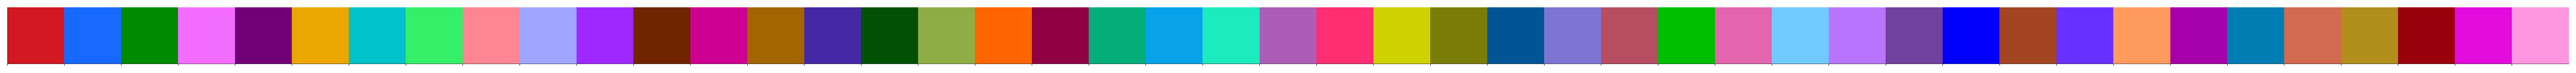

In [96]:
%matplotlib inline
palette = glasbey.create_palette(
    palette_size=len(np.unique(list(dict_keyword_to_label.values()))),
    lightness_bounds=(20, 75),
    chroma_bounds=(50, 90),
)
sns.palplot(palette)

In [97]:
dict_label_to_color = dict(zip(unique_labels, palette))
dict_label_to_color["unlabeled"] = "lightgrey"
dict_label_to_color

{'CNNs': '#d21820',
 'GANs': '#1869ff',
 'LLMs': '#008a00',
 'RL': '#f36dff',
 'RNNs': '#710079',
 'ViTs': '#eba600',
 'active learning': '#00c2ca',
 'adversarial': '#35ef69',
 'anomaly detection': '#ff8692',
 'autoencoders': '#9ea6ff',
 'causality': '#9e28ff',
 'clustering': '#712400',
 'compression': '#ce0092',
 'continual learning': '#a26500',
 'contrastive learning': '#4528a6',
 'diffusion models': '#005104',
 'explainability': '#8eae45',
 'fairness': '#ff6500',
 'federated learning': '#8e0041',
 'few-shot learning': '#04ae79',
 'graphs': '#08a2eb',
 'imitation learning': '#1cebbe',
 'in-context learning': '#ae5db6',
 'interpretability': '#ff2d71',
 'knowledge distillation': '#ced200',
 'language models': '#797d08',
 'meta learning': '#005596',
 'model-based RL': '#7d75d2',
 'multi-agent RL': '#b64d61',
 'multi-task learning': '#00be00',
 'neural architecture search': '#e365ae',
 'object detection': '#71caff',
 'offline RL': '#ba75ff',
 'optimal transport': '#71419e',
 'optimizatio

## Assignment

In [98]:
import itertools


def assign_labels_and_colors(
    data, keywords_and_freqs, dict_keyword_to_label, dict_color_legend=None
):
    """Assign labels and colors from list with lists of keywords.

    Parameters
    ----------
    data: list of lists, len (n_samples)
        List with lists of keywords for every paper.
    keywords_and_freqs: list of lists, len (n_labels)
        List of keywords groups. Contains all keywords and frequencies, with sublists of subgroups of keywords.
    dict_keyword_to_label: dict
        Dictionary assigning to each keyword its label (e.g. to all keywords in same subgroup same label).
    dict_color_legend: dict, len (n_labels)
        Dictionary assigning to each label a color.

    Returns
    -------
    labels: array, shape (n_samples,)
        Label for each paper.
    colors: array, shape (n_samples,)
        Color for each paper.


    """

    # prepare dict_freqs
    dict_freqs = dict(list(itertools.chain.from_iterable(keywords_and_freqs)))
    dict_freqs[
        "unlabeled"
    ] = 1e9  # assign very large value to unlabeled for argmax

    # clean empty lists of keywords from the data
    data_without_empty = [
        ["unlabeled"] if elem == [] else elem for elem in data
    ]

    # choose keywords for each paper
    chosen_keywords = []
    for list_keywords in data_without_empty:
        list_keywords_filtered = [
            elem if elem in set(dict_freqs.keys()) else "unlabeled"
            for elem in list_keywords
        ]

        freqs = np.vectorize(dict_freqs.get)(list_keywords_filtered)

        chosen_keyword = list_keywords_filtered[np.argmin(freqs)]
        chosen_keywords.append(chosen_keyword)

    chosen_keywords = np.array(chosen_keywords)

    # map chosen keywords to labels
    dict_keyword_to_label["unlabeled"] = "unlabeled"
    labels = np.vectorize(dict_keyword_to_label.get)(chosen_keywords)

    # colors
    colors = np.vectorize(dict_color_legend.get)(labels)

    return labels, colors

In [99]:
%%time
labels_iclr, colors_iclr = assign_labels_and_colors(
    iclr2024.keywords.to_list(),
    final_keywords_groups,
    dict_keyword_to_label,
    dict_label_to_color,
)

CPU times: user 604 ms, sys: 0 ns, total: 604 ms
Wall time: 596 ms


In [100]:
# save
np.save(variables_path / "labels_iclr", labels_iclr)
np.save(variables_path / "colors_iclr", colors_iclr)

f = open(variables_path / "dict_label_to_color.pkl", "wb")
pickle.dump(dict_label_to_color, f)
f.close()

In [101]:
print(
    "Percentage of unlabeled papers: ",
    np.sum(labels_iclr == "unlabeled") / len(labels_iclr) * 100,
)
print(
    "Number of unlabeled papers: ",
    np.sum(labels_iclr == "unlabeled"),
)

Percentage of unlabeled papers:  46.60257721415422
Number of unlabeled papers:  11392


In [102]:
print(
    "Papers without any keywords: ",
    np.sum([1 if elem == [] else 0 for elem in iclr2024.keywords])
    / len(labels_iclr)
    * 100,
)

Papers without any keywords:  8.71752914706484


In [103]:
# Examples of papers with keywords that have not being assigned a label
# We can see that they contain very general or very specific keywords that were filtered out in our selection
iclr2024.keywords.to_numpy()[labels_iclr == "unlabeled"][:50]

array([list(['unsupervised learning']), list([]),
       list(['unsupervised learning', 'deep learning']), list([]),
       list(['deep learning', 'supervised learning']),
       list(['deep learning', 'unsupervised learning']), list([]),
       list(['theory', 'deep learning']), list([]),
       list(['deep learning', 'multi-modal learning', 'structured prediction']),
       list(['deep learning']), list([]),
       list(['deep learning', 'theory']),
       list(['deep learning', 'unsupervised learning', 'applications']),
       list(['deep learning']), list(['theory', 'deep learning']),
       list([]), list(['deep learning', 'applications']), list([]),
       list([]), list(['deep learning', 'unsupervised learning']),
       list(['deep learning']), list([]),
       list(['deep learning', 'supervised learning']),
       list(['deep learning', 'unsupervised learning']),
       list(['computer vision', 'deep learning']),
       list(['deep learning', 'computer vision']),
       list([

## Add column to dataframe and resave

In [104]:
iclr2024.head()

,year,id,title,abstract,authors,decision,scores,keywords
0,2017,B1-Hhnslg,Prototypical Networks for Few-shot Learning,A recent approach to few-shot classification c...,"Jake Snell, Kevin Swersky, Richard Zemel",Reject,"[6, 4, 5]","[deep learning, transfer learning]"
1,2017,B1-q5Pqxl,Machine Comprehension Using Match-LSTM and Ans...,Machine comprehension of text is an important ...,"Shuohang Wang, Jing Jiang",Accept (Poster),"[6, 6, 7]","[natural language processing, deep learning]"
2,2017,B16Jem9xe,Learning in Implicit Generative Models,Generative adversarial networks (GANs) provide...,"Shakir Mohamed, Balaji Lakshminarayanan",Invite to Workshop Track,"[8, 7, 6]",[unsupervised learning]
3,2017,B16dGcqlx,Third Person Imitation Learning,Reinforcement learning (RL) makes it possible ...,"Bradly C Stadie, Pieter Abbeel, Ilya Sutskever",Accept (Poster),"[6, 5, 6]",[]
4,2017,B184E5qee,Improving Neural Language Models with a Contin...,We propose an extension to neural network lang...,"Edouard Grave, Armand Joulin, Nicolas Usunier",Accept (Poster),"[7, 9, 5]",[natural language processing]


In [105]:
iclr2024["labels"] = labels_iclr

In [106]:
iclr2024.head()

,year,id,title,abstract,authors,decision,scores,keywords,labels
0,2017,B1-Hhnslg,Prototypical Networks for Few-shot Learning,A recent approach to few-shot classification c...,"Jake Snell, Kevin Swersky, Richard Zemel",Reject,"[6, 4, 5]","[deep learning, transfer learning]",transfer learning
1,2017,B1-q5Pqxl,Machine Comprehension Using Match-LSTM and Ans...,Machine comprehension of text is an important ...,"Shuohang Wang, Jing Jiang",Accept (Poster),"[6, 6, 7]","[natural language processing, deep learning]",language models
2,2017,B16Jem9xe,Learning in Implicit Generative Models,Generative adversarial networks (GANs) provide...,"Shakir Mohamed, Balaji Lakshminarayanan",Invite to Workshop Track,"[8, 7, 6]",[unsupervised learning],unlabeled
3,2017,B16dGcqlx,Third Person Imitation Learning,Reinforcement learning (RL) makes it possible ...,"Bradly C Stadie, Pieter Abbeel, Ilya Sutskever",Accept (Poster),"[6, 5, 6]",[],unlabeled
4,2017,B184E5qee,Improving Neural Language Models with a Contin...,We propose an extension to neural network lang...,"Edouard Grave, Armand Joulin, Nicolas Usunier",Accept (Poster),"[7, 9, 5]",[natural language processing],language models


In [107]:
# save
iclr2024.to_parquet(
    data_path / "iclr24v2.parquet",
    index=False,
    engine="pyarrow",
)

# Print latex table

## Create dataframe

In [127]:
df_table = pd.DataFrame(
    {
        "class_name": list(dict_keyword_to_label.values()),
        "keyword": list(dict_keyword_to_label.keys()),
    },
)
df_table.drop(index=111, inplace=True)  # delete "unlabeled" row
df_table

,class_name,keyword
0,adversarial,adversarial
1,adversarial,adversarial attack
2,adversarial,adversarial attacks
3,adversarial,adversarial defense
4,adversarial,adversarial examples
...,...,...
106,transfer learning,domain generalization
107,ViTs,vision transformer
108,ViTs,vision transformers
109,vision-language models,vision-language models


## Add frequency per keyword

In [128]:
import itertools

dict_freqs = dict(list(itertools.chain.from_iterable(final_keywords_groups)))
dict_freqs

{'adversarial': 60,
 'adversarial attack': 121,
 'adversarial attacks': 106,
 'adversarial defense': 50,
 'adversarial examples': 196,
 'adversarial learning': 93,
 'adversarial machine learning': 54,
 'adversarial robustness': 241,
 'adversarial training': 217,
 'attention': 183,
 'attention mechanism': 53,
 'transformer': 340,
 'transformers': 261,
 'self-attention': 73,
 'autoencoder': 63,
 'autoencoders': 52,
 'vae': 71,
 'variational autoencoder': 93,
 'variational autoencoders': 83,
 'anomaly detection': 109,
 'causal discovery': 53,
 'causal inference': 104,
 'causality': 80,
 'clustering': 116,
 'compression': 121,
 'model compression': 135,
 'object detection': 125,
 'contrastive learning': 344,
 'convolutional neural network': 76,
 'convolutional neural networks': 130,
 'cnn': 88,
 'diffusion': 69,
 'diffusion model': 167,
 'diffusion models': 280,
 'explainability': 131,
 'explainable ai': 92,
 'interpretability': 356,
 'fairness': 182,
 'federated learning': 485,
 'generati

In [129]:
df_table["keyword_frequency"] = df_table["keyword"].map(dict_freqs)

In [130]:
df_table

,class_name,keyword,keyword_frequency
0,adversarial,adversarial,60
1,adversarial,adversarial attack,121
2,adversarial,adversarial attacks,106
3,adversarial,adversarial defense,50
4,adversarial,adversarial examples,196
...,...,...,...
106,transfer learning,domain generalization,124
107,ViTs,vision transformer,98
108,ViTs,vision transformers,51
109,vision-language models,vision-language models,48


## Add n_samples per class

In [131]:
labels_iclr = np.load(variables_path / "labels_iclr.npy")

FileNotFoundError: [Errno 2] No such file or directory: '../results/variables/iclr24v2a/labels_iclr.npy'

In [132]:
class_name_for_samples, class_n_samples = np.unique(
    labels_iclr, return_counts=True
)

In [133]:
dict_n_samples_per_class = dict(zip(class_name_for_samples, class_n_samples))
dict_n_samples_per_class

{'CNNs': 247,
 'GANs': 380,
 'LLMs': 538,
 'RL': 1266,
 'RNNs': 250,
 'ViTs': 130,
 'active learning': 111,
 'adversarial': 870,
 'anomaly detection': 87,
 'autoencoders': 330,
 'causality': 202,
 'clustering': 97,
 'compression': 214,
 'continual learning': 313,
 'contrastive learning': 244,
 'diffusion models': 443,
 'explainability': 194,
 'fairness': 133,
 'federated learning': 298,
 'few-shot learning': 157,
 'graphs': 730,
 'imitation learning': 144,
 'in-context learning': 87,
 'interpretability': 177,
 'knowledge distillation': 150,
 'language models': 802,
 'meta learning': 275,
 'model-based RL': 105,
 'multi-agent RL': 151,
 'multi-task learning': 121,
 'neural architecture search': 138,
 'object detection': 106,
 'offline RL': 184,
 'optimal transport': 132,
 'optimization': 790,
 'out-of-distribution': 275,
 'privacy': 215,
 'pruning': 133,
 'robustness': 175,
 'self-supervised learning': 259,
 'semi-supervised learning': 176,
 'time series': 140,
 'transfer learning': 419

In [134]:
len(dict_n_samples_per_class)

46

In [135]:
df_table["n_samples"] = df_table["class_name"].map(dict_n_samples_per_class)

In [136]:
df_table

,class_name,keyword,keyword_frequency,n_samples
0,adversarial,adversarial,60,870
1,adversarial,adversarial attack,121,870
2,adversarial,adversarial attacks,106,870
3,adversarial,adversarial defense,50,870
4,adversarial,adversarial examples,196,870
...,...,...,...,...
106,transfer learning,domain generalization,124,419
107,ViTs,vision transformer,98,130
108,ViTs,vision transformers,51,130
109,vision-language models,vision-language models,48,108


##  Add number of keywords per class

In [137]:
class_name, class_counts = np.unique(
    list(dict_keyword_to_label.values()), return_counts=True
)

In [138]:
number_keywords_per_class = dict(zip(class_name, class_counts))
number_keywords_per_class

{'CNNs': 3,
 'GANs': 4,
 'LLMs': 4,
 'RL': 2,
 'RNNs': 4,
 'ViTs': 2,
 'active learning': 1,
 'adversarial': 9,
 'anomaly detection': 1,
 'autoencoders': 5,
 'causality': 3,
 'clustering': 1,
 'compression': 2,
 'continual learning': 2,
 'contrastive learning': 1,
 'diffusion models': 3,
 'explainability': 2,
 'fairness': 1,
 'federated learning': 1,
 'few-shot learning': 1,
 'graphs': 5,
 'imitation learning': 1,
 'in-context learning': 1,
 'interpretability': 1,
 'knowledge distillation': 1,
 'language models': 8,
 'meta learning': 2,
 'model-based RL': 1,
 'multi-agent RL': 1,
 'multi-task learning': 1,
 'neural architecture search': 1,
 'object detection': 1,
 'offline RL': 2,
 'optimal transport': 1,
 'optimization': 9,
 'out-of-distribution': 4,
 'privacy': 2,
 'pruning': 2,
 'robustness': 1,
 'self-supervised learning': 1,
 'semi-supervised learning': 1,
 'time series': 2,
 'transfer learning': 3,
 'transformers': 5,
 'unlabeled': 1,
 'vision-language models': 2}

In [139]:
df_table["keywords_per_class"] = df_table["class_name"].map(
    number_keywords_per_class
)

In [140]:
df_table

,class_name,keyword,keyword_frequency,n_samples,keywords_per_class
0,adversarial,adversarial,60,870,9
1,adversarial,adversarial attack,121,870,9
2,adversarial,adversarial attacks,106,870,9
3,adversarial,adversarial defense,50,870,9
4,adversarial,adversarial examples,196,870,9
...,...,...,...,...,...
106,transfer learning,domain generalization,124,419,3
107,ViTs,vision transformer,98,130,2
108,ViTs,vision transformers,51,130,2
109,vision-language models,vision-language models,48,108,2


## sort table by n_samples

In [144]:
df_table.sort_values(
    by=["n_samples", "class_name"], ascending=False, inplace=True
)

In [145]:
df_table

,class_name,keyword,keyword_frequency,n_samples,keywords_per_class
86,RL,reinforcement learning,1608,1266,2
87,RL,deep reinforcement learning,298,1266,2
0,adversarial,adversarial,60,870,9
1,adversarial,adversarial attack,121,870,9
2,adversarial,adversarial attacks,106,870,9
...,...,...,...,...,...
26,object detection,object detection,125,106,1
89,model-based RL,model-based reinforcement learning,111,105,1
23,clustering,clustering,116,97,1
97,in-context learning,in-context learning,105,87,1


## Print table

In [146]:
star = "{*}"
previous_class_name = 0
for i in np.arange(df_table.shape[0]):
    class_name = df_table.iloc[i].class_name
    keyword = df_table.iloc[i].keyword
    frequency = df_table.iloc[i].keyword_frequency

    if (class_name != previous_class_name) | (
        previous_class_name == 0
    ):  # first cell of class
        keywords_per_class_str = (
            "{" + str(df_table.iloc[i].keywords_per_class) + "}"
        )
        # class name
        if class_name[0].isupper():
            class_name_str = "{" + class_name + "}"
        else:
            class_name_str = "{" + class_name[0].upper() + class_name[1:] + "}"

        # n_samples
        n_samples_str = "{" + str(int(df_table.iloc[i].n_samples)) + "}"

        print("\midrule")
        print(
            f"\multirow{keywords_per_class_str}{star}{class_name_str} & \multirow{keywords_per_class_str}{star}{n_samples_str} & {keyword} & {frequency}    \\\\ "
        )

    if class_name == previous_class_name:
        print(f"                      &   &  {keyword} & {frequency} \\\\ ")

    previous_class_name = class_name

\midrule
\multirow{2}{*}{RL} & \multirow{2}{*}{1266} & reinforcement learning & 1608    \\ 
                      &   &  deep reinforcement learning & 298 \\ 
\midrule
\multirow{9}{*}{Adversarial} & \multirow{9}{*}{870} & adversarial & 60    \\ 
                      &   &  adversarial attack & 121 \\ 
                      &   &  adversarial attacks & 106 \\ 
                      &   &  adversarial defense & 50 \\ 
                      &   &  adversarial examples & 196 \\ 
                      &   &  adversarial learning & 93 \\ 
                      &   &  adversarial machine learning & 54 \\ 
                      &   &  adversarial robustness & 241 \\ 
                      &   &  adversarial training & 217 \\ 
\midrule
\multirow{8}{*}{Language models} & \multirow{8}{*}{802} & natural language processing & 433    \\ 
                      &   &  nlp & 166 \\ 
                      &   &  language model & 105 \\ 
                      &   &  language models & 151 \\ 
           